Name   : V.V.S.K.Karthik

RollNO : E21025

MailID : velamuri.kkarthik@praxis.ac.in


# Problem Statement
  - A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 


- The company wants to know: Which variables are significant in predicting the demand for shared bikes.How well those variables describe the bike demands. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

<img src="Bikesharingimage.jfif">

# Actions performed :
- Importing and reading data
- Finding Missing values    
- Univariate and Bivariate Analysis for better insights of data
- Feature selection
- Considered the Linear regression Assumptions
- Model Building
- Model evaluation
- Statistical Analysis to avoid multicollinearity and finding best features of the data
- Verifying the accuracy after training the model on the new features which was considered after perfomring statistical analysis

## 1. Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [226]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the day.csv data 


In [227]:
#Reading data from day.csv 
data=pd.read_csv('day.csv')

# Displaying the first 5 rows of data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#  3. Data Description

In [228]:
#Displaying the number of rows and columns in the data
data.shape

(730, 16)

In [229]:
#Displaying data typesa ling with non-null count of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Inferences: 
    - Null values are not present in the data
    - Some of the categorical columns like [season,yr,mnth,holiday,weekday,workingday,weathersit] are treated as dataype int which we need to convert to object in further steps

In [230]:
#Summary of the dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 4. Inspecting Missing Values

In [231]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Inferences:

    - To be confident we executed this command which says, We dont have any null values

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# 5. Treating unnecessary columns

In [232]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [233]:
# removing instant column from the dataset since its a record index and doesn't help in our analysis
data.drop('instant',axis=1,inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
# Confirming the columns after removal of 'instant' column
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Lets Not consider dta(date) in this analysyis. Since the day and month has been already explained by mnth and yr columns. Considering this may be lead to multicollinearity

In [235]:
# Dropping the dteday column using index iloc
data=data.iloc[:,1:]
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Assumption 1: Verify that Data has linear Relationship

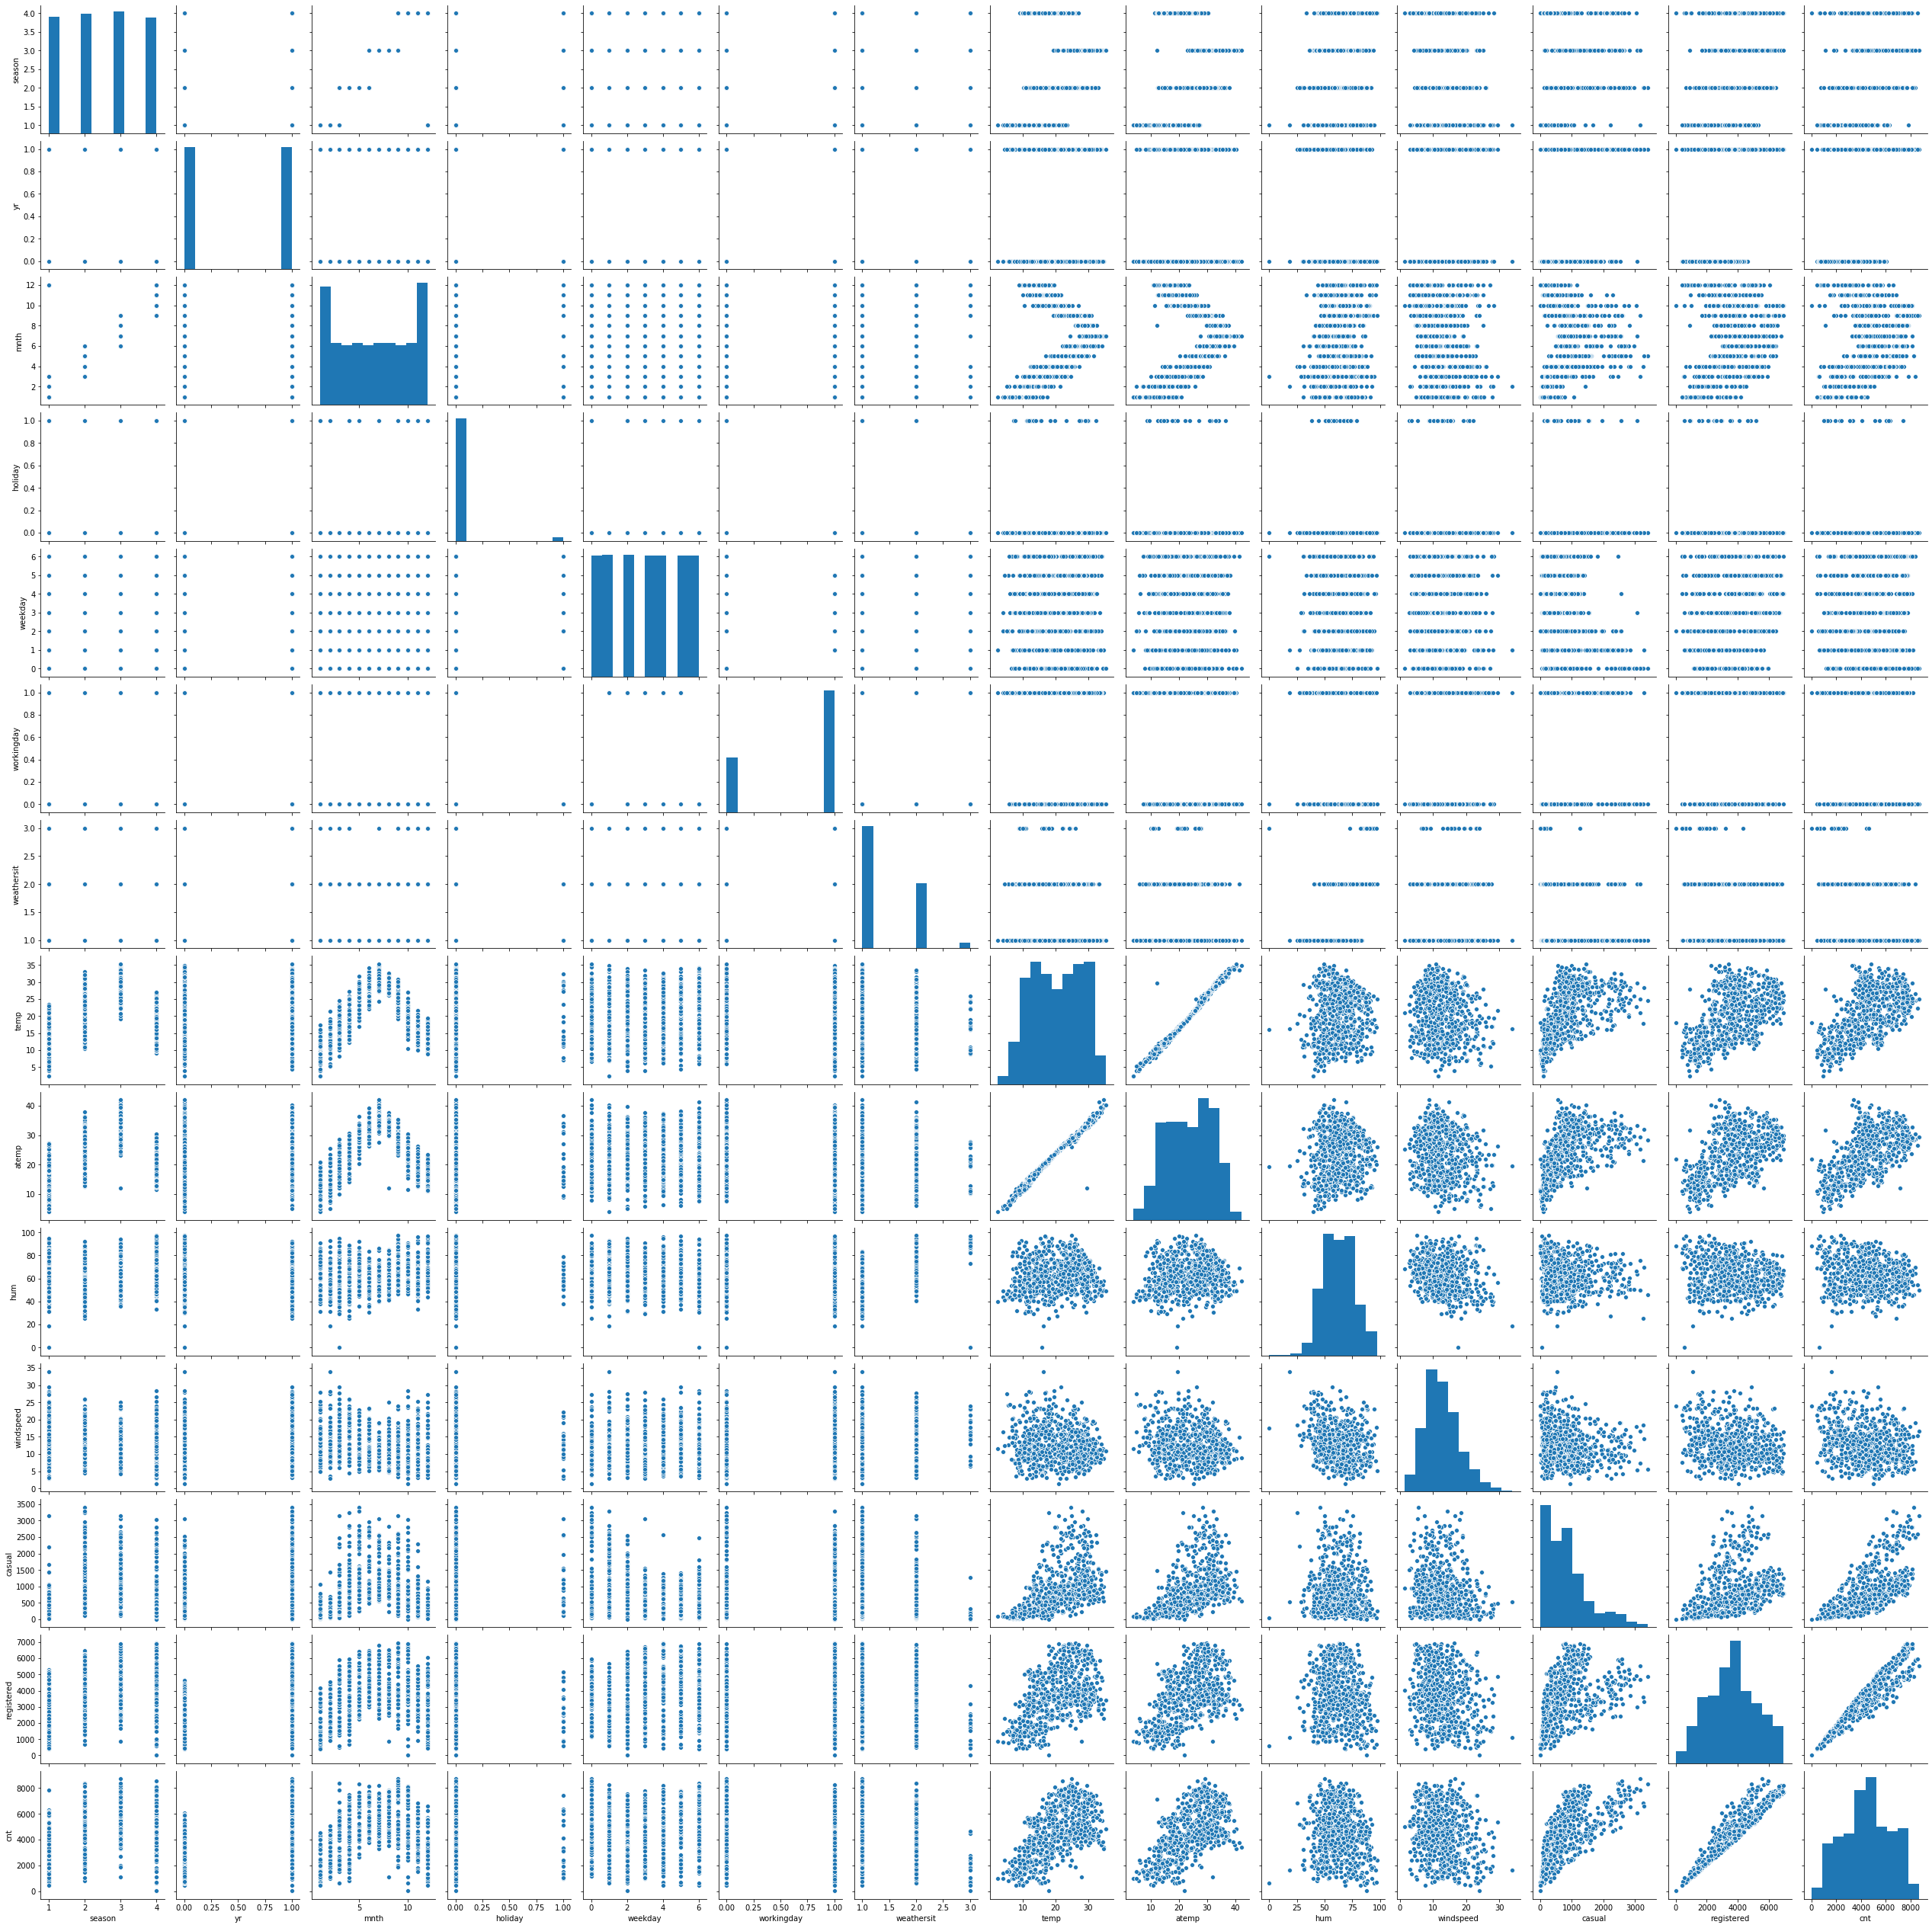

In [236]:
# Pairplot to understand the relationship between varibales in the data 
sns.pairplot(data)

# Insights:

    - We observed that there is a linear relationship between temp and cnt columns,which is good sign for our prediction
    - we oberved that temp and atemp has high degree of positive correltation betwen them almost a straight line which indiactes high linear relationship, Dropping one of the column is a good practice to avoid multicollinearity

## Visualise the categorical columns

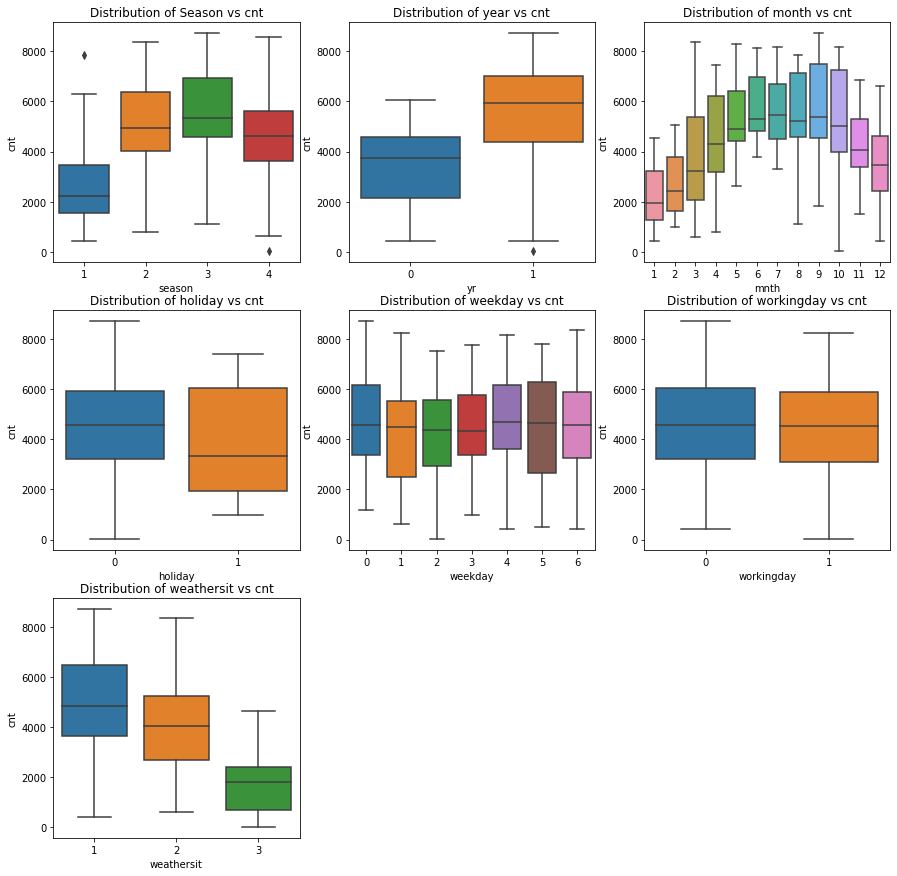

In [237]:
## Visualise the categorical columns

plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Distribution of Season vs cnt')
sns.boxplot('season','cnt',data=data)

plt.subplot(3,3,2)
plt.title('Distribution of year vs cnt')
sns.boxplot('yr','cnt',data=data)

plt.subplot(3,3,3)
plt.title('Distribution of month vs cnt')
sns.boxplot('mnth','cnt',data=data)

plt.subplot(3,3,4)
plt.title('Distribution of holiday vs cnt')
sns.boxplot('holiday','cnt',data=data)

plt.subplot(3,3,5)
plt.title('Distribution of weekday vs cnt')
sns.boxplot('weekday','cnt',data=data)

plt.subplot(3,3,6)
plt.title('Distribution of workingday vs cnt')
sns.boxplot('workingday','cnt',data=data)

plt.subplot(3,3,7)
plt.title('Distribution of weathersit vs cnt')
sns.boxplot('weathersit','cnt',data=data)
plt.show()

# 6. MultiCollinearity Treatment

# Treating temp and atemp Features
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius
    

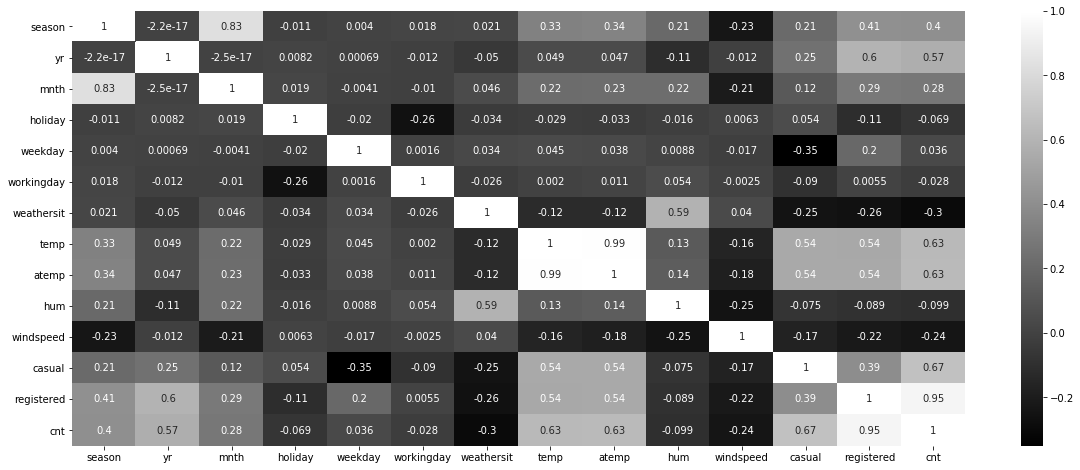

In [238]:
# Lets understand correlations of numerical columns

plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap='gray',annot=True)

# Insights

    - We comuld observe that temp and atemp are correlated so we can drop one of the columns to avoid multicollinearity
    - We observed similar relationship when we did visulisation using pairplot

In [239]:
# Drop atemp column from the dataset
data.drop(['atemp'],axis=1,inplace=True)

In [240]:
#confirming that atemp column has been dropped by using dataframe.head()
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


## Investigating where datatype is integer

    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered
    
### Since cnt(count of total rental bikes) is equal to sum of casual and registered column,we can consider cntcolumn and drop casual and registered columns so that we can avoid multi collinearity in the data

In [241]:
#since casual and registered sum is equal to cnt we can drop them to avoid multicollinearity

data.drop(['casual','registered'],axis=1,inplace=True)

In [242]:
#Confirming that the selected  columns are dropped
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


## Assumption: The independent variables should not be correlated absence of this phenomenon may leads to Multicollinearity. 

    - we have removed atemp since this column(independent variable) is correlated with temp variable    
    - We have removed casual and registered column since sum of these two independent features results in cnt column which is our target column and may mislead our model

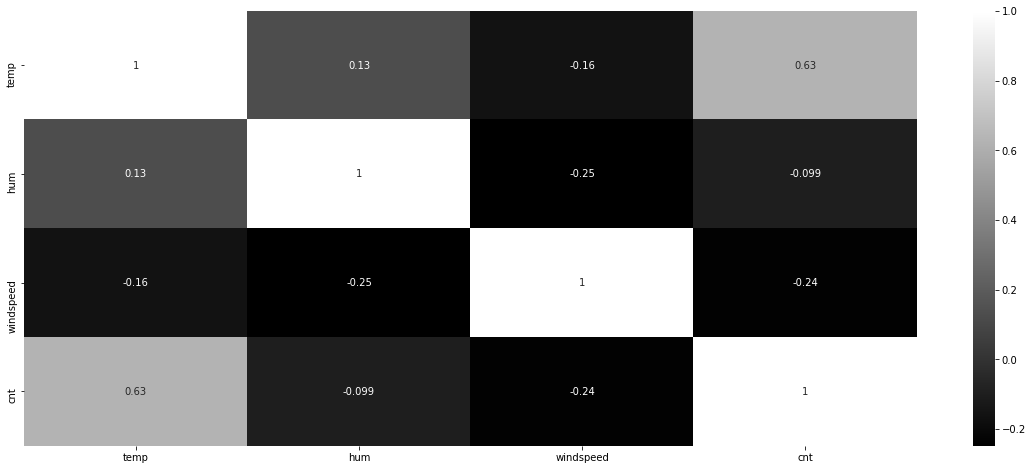

In [243]:
#correlation between numerical columns

numerical_columnscorr=data[['temp','hum','windspeed','cnt']]

plt.figure(figsize=(20,8))
sns.heatmap(numerical_columnscorr.corr(),cmap='gray',annot=True)
plt.show()

## Inferences:

    - cnt(Target) column has highest correlation with temp column

## Treating season column which was encoded as 1,2,34 in the given dataframe

In [244]:
# Function to convert season column to their season names
def func_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'

In [245]:
# Apply above function on season column
data['season']=data['season'].apply(func_season)

In [246]:
# confirming the change mad in the previous step
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


## Treating Month column which was encoded from 1-12 in the serial order of monthwise

In [247]:
# Treat mnth(month) column which was given as encoded format in dataset as 1 to 12

def func_mnth(x):
    return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# convert month column with the name of months which was given as 1-12 in our dataset
data[['mnth']]=data[['mnth']].apply(func_mnth)

In [248]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,1,9.305237,43.6957,12.522300,1600


## Univariate Analysis

## Lets treat categorical columns

In [249]:
# create a univariate_analysis function which helps in analysing uivariate analysis

def univariate_analysis(feature):
    plt.figure(figsize=(10,6))
    plt.title('Count of different categories in '+feature)
    sns.countplot(feature,data=data)
    plt.show()

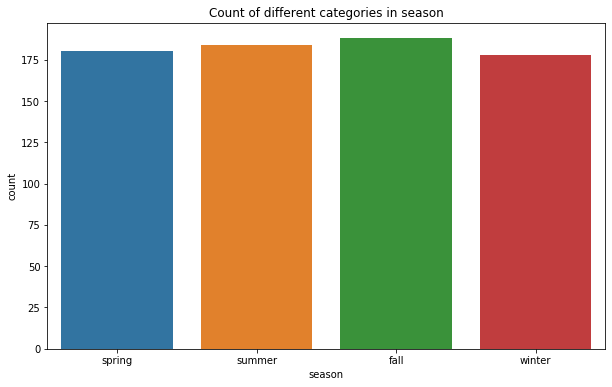

In [250]:
# univariate analysis on Season column

univariate_analysis('season')

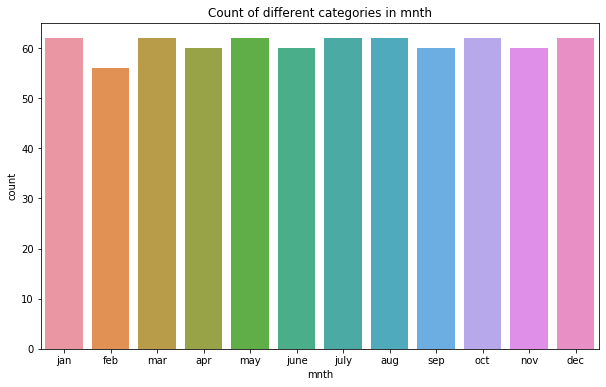

In [251]:
# univariate analysis on mnth(month) column
univariate_analysis('mnth')

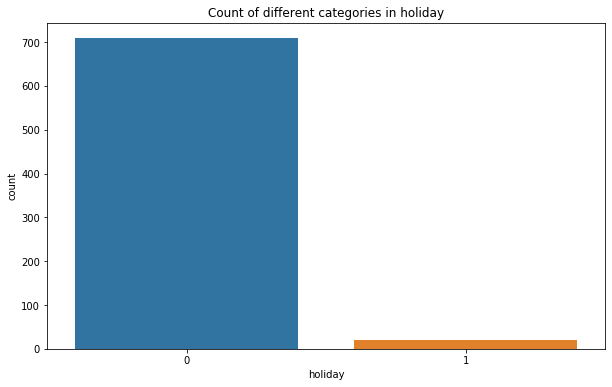

In [252]:
# univariate analysis on holiday column
univariate_analysis('holiday')

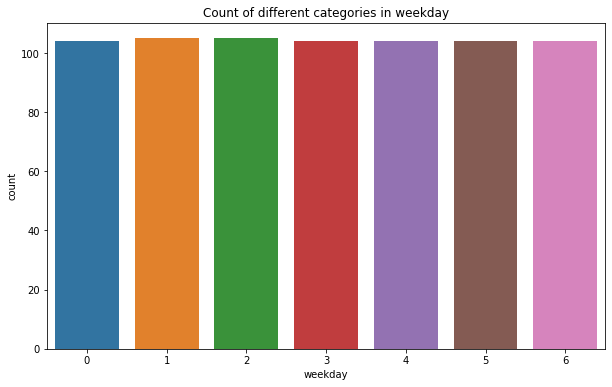

In [253]:
# univariate analysis on weekday column
univariate_analysis('weekday')

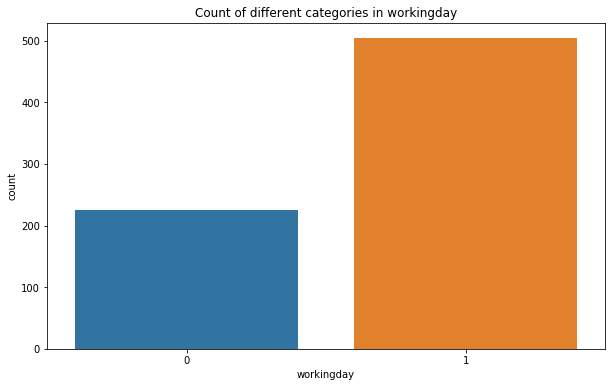

In [254]:
# univariate analysis on workingday column
univariate_analysis('workingday')

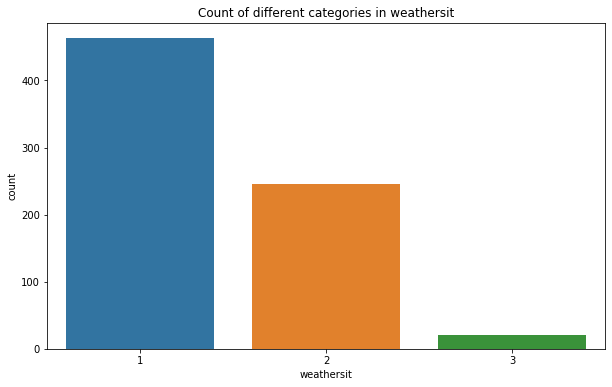

In [255]:
# univariate analysis on weatersit column
univariate_analysis('weathersit')

## Multivariate Analysis

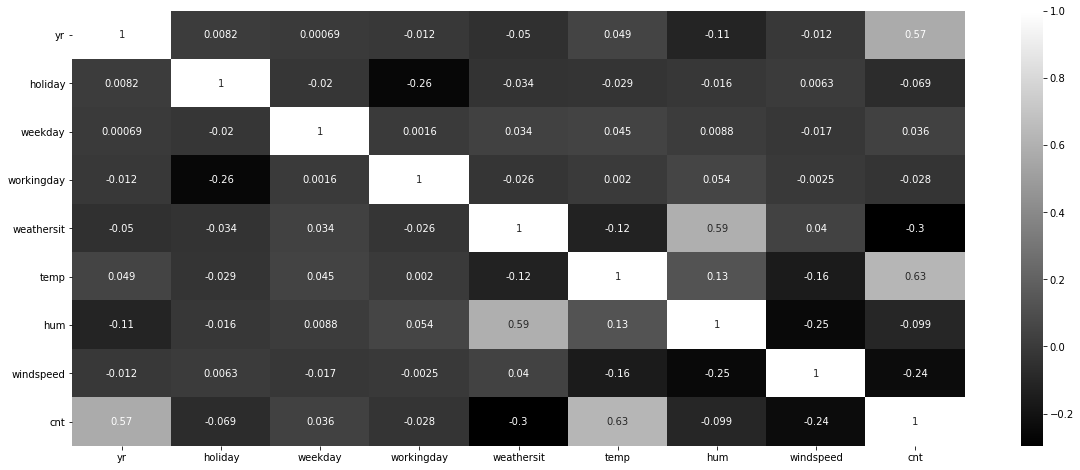

In [256]:
# Lets understand correlations of numerical columns

plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap='gray',annot=True)
plt.show()

# Insights from heatmap

- cnt(Target variable) is explained by temp and atemp variables with same coorelation so we can drop one of the columns 
- windspeed is negatively correlated with cnt, which is quite obvious when there is a high windspeed bikerides re not preferrable by many people, Further analysis is required in the next steps

# Datatype Handling

In [257]:
#Verify the datatype of a column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 62.9+ KB


### We Noticed from dataDictionary that the following columns are categorical but the datatype of this colmns are int in the dataset and we need to treat them:
 
 - yr
 - holiday
 - weekday
 - workingday
 - weathersit

In [258]:
#Lets convert datatype into datatype:object where column is mentioned as int but actually they are categorical in nature

data['yr']=data['yr'].astype('object')
data['holiday']=data['holiday'].astype('object')
data['weekday']=data['weekday'].astype('object')
data['workingday']=data['workingday'].astype('object')
data['weathersit']=data['weathersit'].astype('object')

In [259]:
#Verify the datatype of a column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [260]:
## We have converted the categorical datatypes to the required datatype,Lets roceed with further analysis

In [261]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,2,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,2,1,2,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,3,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,1,9.305237,43.6957,12.522300,1600


In [262]:
#consoder variable y as Target column which is cnt(count) of bikes

y=data.iloc[:,-1:]
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
725,2114
726,3095
727,1341
728,1796


In [263]:
#dropping cnt column from the dataset since it has been taken as Target column
data.drop('cnt',axis=1,inplace=True)

## Categorical column Treatment in Feature/input variables

In [264]:
#categorical columns are formed in the new dataframe which is data_categorical
data_categorical=data.iloc[:,0:7]
data_categorical

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,jan,0,1,1,2
1,spring,0,jan,0,2,1,2
2,spring,0,jan,0,3,1,1
3,spring,0,jan,0,4,1,1
4,spring,0,jan,0,5,1,1
...,...,...,...,...,...,...,...
725,spring,1,dec,0,5,1,2
726,spring,1,dec,0,6,0,2
727,spring,1,dec,0,0,0,2
728,spring,1,dec,0,1,1,1


In [265]:
#Non-Categorical columns are created in a new dataframe. i.e..,data_noncategorical

data_noncategorical=data.iloc[:,7:]
data_noncategorical

,temp,hum,windspeed
0,14.110847,80.5833,10.749882
1,14.902598,69.6087,16.652113
2,8.050924,43.7273,16.636703
3,8.200000,59.0435,10.739832
4,9.305237,43.6957,12.522300
...,...,...,...
725,10.420847,65.2917,23.458911
726,10.386653,59.0000,10.416557
727,10.386653,75.2917,8.333661
728,10.489153,48.3333,23.500518


## Categorical columns are treated using dummy varibale creation

In [266]:
# we are using pandas inbuilt method which is get_dummies() method to treat the categorical column.

data_categorical=pd.get_dummies(data_categorical,drop_first=True)
data_categorical

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
726,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Inferences:

    - We could observe that get_dummies() has been applied on categorical columns
    - drop_first=True has dropped one of the category in eacch feature to avoid dummy variable trap

In [267]:
# Lets see the shape of categorical and non-categoricla columns in our Input/feature/x
print(data_categorical.shape)
print(data_noncategorical.shape)

(730, 25)
(730, 3)


In [268]:
#lets combine two dataframes data_1 and data_2 since caetgorical columns tretament has been performed

final_data=pd.concat([data_categorical,data_noncategorical],axis=1)
final_data

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,hum,windspeed
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,14.110847,80.5833,10.749882
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,14.902598,69.6087,16.652113
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,8.050924,43.7273,16.636703
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,8.200000,59.0435,10.739832
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,9.305237,43.6957,12.522300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,10.420847,65.2917,23.458911
726,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,10.386653,59.0000,10.416557
727,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,10.386653,75.2917,8.333661
728,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,10.489153,48.3333,23.500518


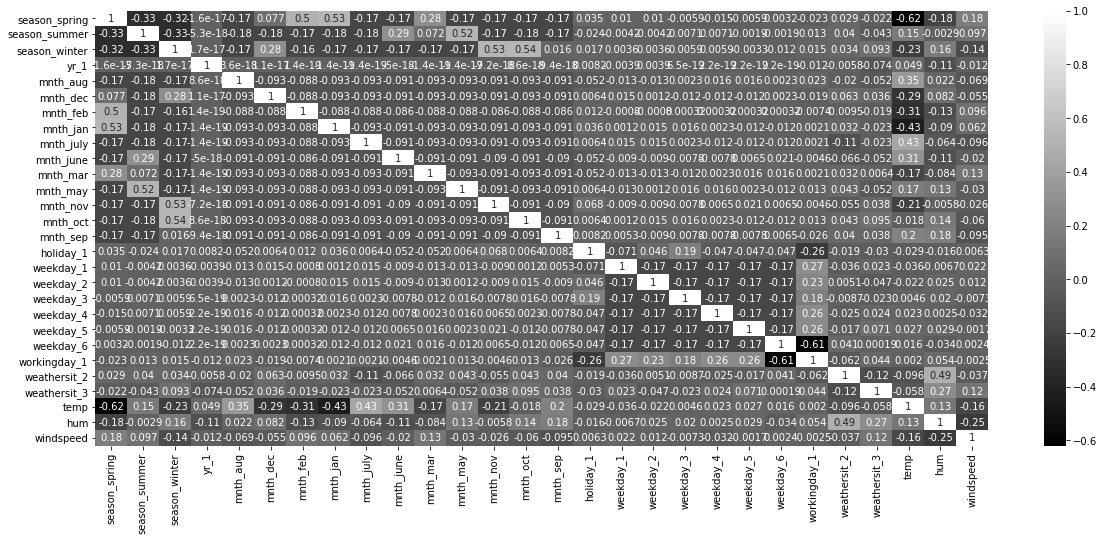

In [269]:

plt.figure(figsize=(20,8))
sns.heatmap(final_data.corr(),annot=True,cmap='gray')

In [270]:
y

,cnt
0,985
1,801
2,1349
3,1562
4,1600
...,...
725,2114
726,3095
727,1341
728,1796


In [271]:
final_data.head()

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,hum,windspeed
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,14.110847,80.5833,10.749882
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,14.902598,69.6087,16.652113
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,8.050924,43.7273,16.636703
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,8.200000,59.0435,10.739832
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,9.305237,43.6957,12.522300


## Splitting the Data into Training and Testing Sets for model building process

In [272]:
# import train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

In [273]:
# Lets consider 80 percent of our data into trainning data and 20 percent to test data
x_train,x_test,y_train,y_test=train_test_split(final_data,y,test_size=0.20,random_state=42)

In [274]:
# Verifying the shape after train and test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 28)
(146, 28)
(584, 1)
(146, 1)


## Scaling the Data

In [275]:
# Applying min max scaling
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

## We are going to apply scaling on three independent variables where the column datatype is int

In [276]:
# Appply min max scaling which scales the value between 0 and 1
# Final_data is the name given to dataframe and this will be passed to model after scaling is applied

final_data[['temp','hum','windspeed']]=mm.fit_transform(final_data[['temp','hum','windspeed']])
final_data.head()

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,hum,windspeed
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0.355170,0.828620,0.284606
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0.379232,0.715771,0.466215
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0.171000,0.449638,0.465740
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0.175530,0.607131,0.284297
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0.209120,0.449313,0.339143


In [277]:
# Look at description to see that min and max has been applied on the numerical columns which we applied using min max scaler
final_data.describe()

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836,0.500000,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,...,0.142466,0.142466,0.142466,0.142466,0.690411,0.336986,0.028767,0.543852,0.645400,0.346568
std,0.431313,0.434490,0.429689,0.500343,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,...,0.349767,0.349767,0.349767,0.349767,0.462641,0.473004,0.167266,0.228140,0.146402,0.159873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346084,0.534704,0.232045
50%,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.548307,0.643959,0.326928
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.743261,0.750535,0.434629
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
# apply scaling on target column. i.e..,y/Dependent variable
y=mm.fit_transform(y)
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [279]:
final_data.head()

,season_spring,season_summer,season_winter,yr_1,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,temp,hum,windspeed
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0.355170,0.828620,0.284606
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0.379232,0.715771,0.466215
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0.171000,0.449638,0.465740
3,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0.175530,0.607131,0.284297
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0.209120,0.449313,0.339143


## Model Building

In [280]:
# import Linearregression model
from sklearn.linear_model import LinearRegression

In [281]:
#Instantiating the object
lr=LinearRegression()

# Fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [282]:
# Applying prediction
y_pred=lr.predict(x_test)
y_pred

array([[6266.60218926],
       [4448.90655697],
       [3781.07312314],
       [1869.19469897],
       [7248.50840443],
       [4946.06484135],
       [2606.8521204 ],
       [2749.12194236],
       [3372.39251536],
       [3568.96854734],
       [3221.82323921],
       [5032.96792409],
       [2364.9024618 ],
       [4616.49060821],
       [4952.88827355],
       [3496.42427604],
       [5712.0911534 ],
       [1376.67133029],
       [6142.79274976],
       [4286.89121516],
       [3390.62235511],
       [4495.54022207],
       [5184.28508456],
       [5796.78630047],
       [4960.39995747],
       [5311.13533253],
       [3916.99028667],
       [ 894.0015578 ],
       [4626.97824282],
       [1868.02401239],
       [3433.45446447],
       [3567.3196394 ],
       [1137.02134211],
       [1647.26401045],
       [5602.41329244],
       [4969.52897957],
       [3052.34763726],
       [3220.44766391],
       [ 881.19575991],
       [7491.05471401],
       [1677.79978791],
       [5475.771

## Intercept and coefficient of our model

In [283]:
# Intercept and coefficient of our model
# In multi linear regression line we had multiple coefficient as shown in the output below and one Intercept .i.e.., The point at y=0 line cuts the y-axis

print("Intercept of ou model is: ",lr.intercept_)
print()
print("Coefficient of our model is: ",lr.coef_)

Intercept of ou model is:  [3168.70005602]

Coefficient of our model is:  [[ -999.34354302   111.25868988   732.57761308  1972.02785072
   -100.30530319  -444.95141381   -87.84421801  -208.93022736
   -404.34794324    -8.84027211   300.16477604   238.50440562
   -542.37407234   169.04790161   547.05582934  -908.23198131
    -23.13883692     8.17958174   112.28552877   291.40898422
    261.63408836  -142.48897529  -371.89990233  -450.35106543
  -2090.09358073   112.33458001   -14.20024824   -43.08038245]]


## Residual Analysis

## Lets see another analysis where error terms should be normally distributed

In [284]:
# y_train_pred is used to predict output on the training data
y_train_pred=lr.predict(x_train)

In [285]:
# Finding residual, to understand difference between fitted value and predicted value
residual=y_train-y_train_pred
residual

,cnt
247,-483.305700
335,216.222500
702,790.254416
440,2869.529889
136,538.912682
...,...
71,70.976422
106,281.508510
270,-1271.100731
435,365.003782


## Assumption: Error Terms should be normally distributed

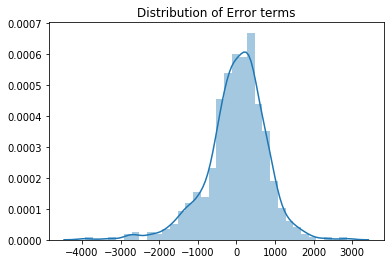

In [286]:
# ditplot is used to analyse the distribution of Residual terms

plt.title('Distribution of Error terms')
sns.distplot(residual)
plt.show()

# Inferences:

    - We could see that Error terms are normally distributed with almost/closely mean equal to 0.Now lets Evaluate our model

## Model Evaluation

In [287]:
# Import r2_score from sklearn.metrics
from sklearn.metrics import r2_score

In [288]:
# R-Squared score 

r2_score(y_test,y_pred)

0.8594068226029885

In [289]:
# metrcis Evaluation

from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean squared Error: ",mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
print("Roor mean squared Error: ",(np.sqrt(mean_squared_error(y_test,y_pred))))


Mean squared Error:  481228.22802289005
Mean Absolute Error:  531.6612536232063
Roor mean squared Error:  693.7061539462441


## Inferences:

    - Its a good sign to look at MeanSquaredError and MeanAbsoluteError as well.

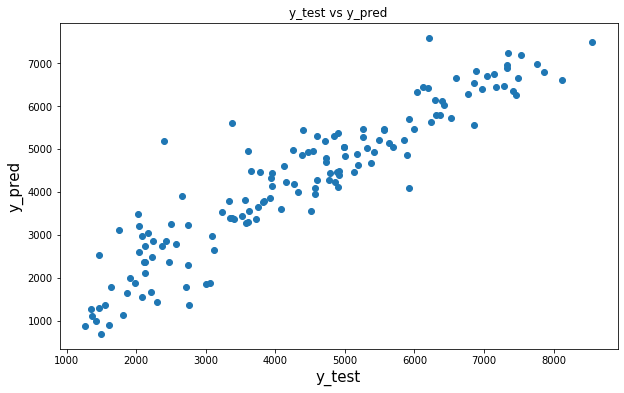

In [290]:
# Plotting y_test and y_pred using sactter plot to understand the spread of the Target variables

plt.figure(figsize=(10,6))
plt.title('y_test vs y_pred')
plt.scatter(y_test,y_pred)
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_pred', fontsize=15)
plt.show()

## Inference:

        - y_test and y_pred are linearly related as shown above which indicates model has performed well in predicting        on test data

## Lets see Adjusted R2 value which is a good metric for multiple linear regression analysis


### r2 score on train data

In [291]:
#r2 score on train data
yhat=lr.predict(x_train)                                # yhat is predicted value
RSS=np.sum((yhat-y_train)**2)                           # rss=(yhat-y)**2
TSS=np.sum((np.mean(yhat)-y_train)**2)
r2=1-(RSS/TSS)
print(r2)

cnt    0.84233
dtype: float64


### r2 score on test data

In [292]:
#r2 score on test data

yhat=lr.predict(x_test)                    # y-hat here is predicted value on test data
RSS=np.sum((yhat-y_test)**2)
TSS=np.sum((np.mean(yhat)-y_test)**2)
r2=1-(RSS/TSS)
print(r2)

cnt    0.859794
dtype: float64


### Adjusted r2 on training data

In [293]:
# Adjusted r2 on training data

yhat = lr.predict(x_train)                             # y-hat here is predicted value on train data
SumSquaresResidual = np.sum((y_train-yhat)**2)
SumSquaresTotal = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

cnt    0.84233
dtype: float64 cnt    0.834375
dtype: float64


### Adjusted r2 on test data

In [294]:
# Adjusted r2 on test data

yhat = lr.predict(x_test)                              # y-hat here is predicted value on test data
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

cnt    0.859407
dtype: float64 cnt    0.825761
dtype: float64


## Inference:

    - Adjusted r2 is considered as better metrics in Multiple Linear regression considering that we have obtained 0.834375 in train data
    - Adjusted r2 for test datais 0.825761

# Inferences on Overall model Building,evaluation and Prediction:

    - Adjusted r2 is good measure for Multiple linear regression,since we have multiple independent variables
    - Adjusted r2 on train data is: 0.834375
    - Adjusted r2 on test data is 0.825761
    - We could see that Error terms are normally distributed with almost/closely mean equal to 0.Now lets Evaluate our model
    - the plot we have drawn on y_test and y_pred shows a good linear relation,which indicates good model perfomance

 ## Stats model Analysis

In [295]:
# Import stats models library for statistical analysis

import statsmodels.api as sm   
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [296]:
# Created a user defined functin called statsmodel_analysis for furter stats analysis,which will reduce the lines of code

def statsmodel_analysis(x,y):
    x=sm.add_constant(x)                 # step 1: Add cnstant
    result=sm.OLS(y,x).fit()             # step 2:fit the model
    print(result.summary())              # step 3: return the summary    

In [297]:
# Created a user defined functin called checkVIF for furter stats analysis,which will reduce the lines of code

def MeasureVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## stats model 1

In [298]:
# considering all the columns where adjusted r2 is 0.834 which has been noticed by performing model evaluatin using sklearn

x_train_stats1=x_train
statsmodel_analysis(x_train_stats1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          3.30e-202
Time:                        20:43:03   Log-Likelihood:                -4714.4
No. Observations:                 584   AIC:                             9487.
Df Residuals:                     555   BIC:                             9614.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3168.7001    404.839      7.827

In [299]:
MeasureVIF(x_train_stats1)

,Features,VIF
22,workingday_1,171.63
25,temp,44.76
17,weekday_2,38.00
26,hum,37.98
16,weekday_1,36.73
20,weekday_5,35.74
19,weekday_4,34.98
18,weekday_3,34.06
0,season_spring,12.32
2,season_winter,11.61


## Insights:

    - Pvalue for weekday_2 is 0.987 lets remove this since its statistically insignificant in our model
    - Highest VIF:172.63 has been noticed for workingday_1
    - Adjusted r2 : 0.834

## Stats model 2

In [300]:
# weekday_2 has high p-value greater than 0.05 lets drop this column from our analysis

# x_train_stats2 dataframe doesn't hold weekday_2 column/feature

x_train_stats2=x_train_stats1.drop(['weekday_2'],axis=1)
statsmodel_analysis(x_train_stats2,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          3.12e-203
Time:                        20:43:03   Log-Likelihood:                -4714.4
No. Observations:                 584   AIC:                             9485.
Df Residuals:                     556   BIC:                             9607.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3168.5737    404.395      7.835

In [301]:
MeasureVIF(x_train_stats2)

,Features,VIF
24,temp,44.75
25,hum,37.96
0,season_spring,12.31
2,season_winter,11.60
21,workingday_1,9.62
26,windspeed,7.45
13,mnth_oct,7.05
1,season_summer,6.74
12,mnth_nov,6.30
7,mnth_jan,6.02


## Insights;

    - PValue for mnth_june is 0.966 lets remove this since its statistically insignificant in our model
    - VIF for temp is 44.75
    - Adjusted r2 :0.835 

## stats model 3

In [302]:
# Drop mnth_june column where p-value is 0.966 which is statistically not significant

# x_train_stats3 dataframe doens't hold weekday_2 and weekday_1 column/feature

x_train_stats3=x_train_stats1.drop(['weekday_2','mnth_june'],axis=1)
statsmodel_analysis(x_train_stats3,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.89e-204
Time:                        20:43:04   Log-Likelihood:                -4714.4
No. Observations:                 584   AIC:                             9483.
Df Residuals:                     557   BIC:                             9601.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3165.5913    398.099      7.952

In [303]:
MeasureVIF(x_train_stats3)

,Features,VIF
24,hum,37.77
23,temp,26.37
0,season_spring,12.23
2,season_winter,11.54
20,workingday_1,9.62
25,windspeed,7.42
1,season_summer,6.34
12,mnth_oct,6.28
11,mnth_nov,5.99
7,mnth_jan,5.97


# Insights:

    - pvalue of weekday_1 is 0.796 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is highest at 37.77
    - Adjusted r2 : 0.835

    

## stats Model 4

In [304]:
# Drop weekday_1 column where p-value is 0.796 which is statistically not significant

# x_train_stats4 dataframe doens't hold weekday_2, weekday_1 and mnth_june

x_train_stats4=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1'],axis=1)
statsmodel_analysis(x_train_stats4,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     119.2
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.70e-205
Time:                        20:43:04   Log-Likelihood:                -4714.5
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     558   BIC:                             9595.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3162.7421    397.614      7.954

In [305]:
MeasureVIF(x_train_stats4)

,Features,VIF
23,hum,37.76
22,temp,26.37
0,season_spring,12.22
2,season_winter,11.54
19,workingday_1,7.44
24,windspeed,7.41
1,season_summer,6.33
12,mnth_oct,6.28
11,mnth_nov,5.99
7,mnth_jan,5.97


# Insights:
    - PValue of mnth_feb is 0.770 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is highest at 37.76
    - Adjusted r2 : 0.835

## stats Model 5

In [306]:
# Drop mnth_feb column where p-value is 0.770 which is statistically not significant

# x_train_stats5 dataframe doens't hold weekday_2, mnth_june,weekday_1 and mnth_feb columns/feature

x_train_stats5=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb'],axis=1)
statsmodel_analysis(x_train_stats5,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.50e-206
Time:                        20:43:04   Log-Likelihood:                -4714.5
No. Observations:                 584   AIC:                             9479.
Df Residuals:                     559   BIC:                             9588.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3118.9127    367.914      8.477

In [307]:
MeasureVIF(x_train_stats5)

,Features,VIF
22,hum,34.87
21,temp,24.73
2,season_winter,9.64
18,workingday_1,7.44
23,windspeed,7.27
1,season_summer,6.33
0,season_spring,6.13
11,mnth_oct,4.94
10,mnth_nov,4.61
7,mnth_july,3.23


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of mnth_aug is 0.694 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is high at 34.87

## stats model 6

In [308]:
# Drop mnth_aug column where p-value is 0.694 which is statistically not significant

# x_train_stats6 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb and mnth_aug columns/feature

x_train_stats6=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug'],axis=1)
statsmodel_analysis(x_train_stats6,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.34e-207
Time:                        20:43:04   Log-Likelihood:                -4714.6
No. Observations:                 584   AIC:                             9477.
Df Residuals:                     560   BIC:                             9582.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3075.2187    350.535      8.773

In [309]:
MeasureVIF(x_train_stats6)

,Features,VIF
21,hum,33.33
20,temp,22.15
2,season_winter,9.22
17,workingday_1,7.40
22,windspeed,7.14
0,season_spring,4.80
10,mnth_oct,4.56
9,mnth_nov,4.41
1,season_summer,3.71
4,mnth_dec,2.66


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of mnth_jan is 0.415 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is high at 33.33

## stats model 7

In [310]:
# Drop mnth_jan column where p-value is 0.415 which is statistically not significant

# x_train_stats7 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug and mnth_jan columns/feature

x_train_stats7=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan'],axis=1)
statsmodel_analysis(x_train_stats7,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     135.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          2.76e-208
Time:                        20:43:05   Log-Likelihood:                -4714.9
No. Observations:                 584   AIC:                             9476.
Df Residuals:                     561   BIC:                             9576.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3016.2655    342.918      8.796

In [311]:
MeasureVIF(x_train_stats7)

,Features,VIF
20,hum,32.19
19,temp,21.21
2,season_winter,9.02
16,workingday_1,7.40
21,windspeed,7.10
9,mnth_oct,4.40
8,mnth_nov,4.22
0,season_spring,4.16
1,season_summer,3.71
4,mnth_dec,2.40


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of weekday_3 is 0.288 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is high at 32.19

## stats modle 8

In [312]:
# Drop weekday_3 column where p-value is 0.288 which is statistically not significant

# x_train_stats8 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug,mnth_jan and weekday_3 columns/feature

x_train_stats8=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3'],axis=1)
statsmodel_analysis(x_train_stats8,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          4.00e-209
Time:                        20:43:05   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9475.
Df Residuals:                     562   BIC:                             9571.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3006.6185    342.837      8.770

In [313]:
MeasureVIF(x_train_stats8)

,Features,VIF
19,hum,32.18
18,temp,21.18
2,season_winter,9.01
20,windspeed,7.09
15,workingday_1,6.79
9,mnth_oct,4.40
8,mnth_nov,4.21
0,season_spring,4.16
1,season_summer,3.70
4,mnth_dec,2.40


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of weekday_6 is 0.248 we can remove this feature,Since high p-value indicates feature is insignificant in model
    - VIF for hum is high at 32.18

## stats model 9

In [314]:
# Drop weekday_6 column where p-value is 0.248 which is statistically not significant

# x_train_stats9 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug,mnth_jan,weekday_3 and weekday_6 columns/feature

x_train_stats9=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6'],axis=1)
statsmodel_analysis(x_train_stats9,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          6.28e-210
Time:                        20:43:05   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2939.3359    337.966      8.697

In [315]:
MeasureVIF(x_train_stats9)

,Features,VIF
18,hum,32.00
17,temp,20.21
2,season_winter,8.97
19,windspeed,7.05
9,mnth_oct,4.40
14,workingday_1,4.26
8,mnth_nov,4.20
0,season_spring,4.02
1,season_summer,3.66
4,mnth_dec,2.39


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of mnth_oct is 0.209 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is high at 32.00

## statsmodel 10

In [316]:
# Drop mnth_oct column where p-value is 0.209 which is statistically not significant

# x_train_stats10 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug,mnth_jan,weekday_3,weekday_6 and mnth_oct columns/feature

x_train_stats10=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6','mnth_oct'],axis=1)
statsmodel_analysis(x_train_stats10,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     156.9
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          1.08e-210
Time:                        20:43:06   Log-Likelihood:                -4717.0
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     564   BIC:                             9561.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2951.6913    337.997      8.733

In [317]:
MeasureVIF(x_train_stats10)

,Features,VIF
17,hum,31.66
16,temp,20.21
18,windspeed,7.03
13,workingday_1,4.26
0,season_spring,4.01
2,season_winter,3.82
1,season_summer,3.57
14,weathersit_2,2.35
3,yr_1,2.10
5,mnth_july,1.80


# Insights:

    - Adjusted r-squared is 0.836
    - pvalue of season_summer is 0.257 we can remove this feature, Since high p-value indicates feature is insignificant in model
    - VIF for hum is at 31.66

## statsmodel 11

In [318]:
# Drop season_summer  column where p-value is 0.257 which is statistically not significant

# x_train_stats11 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug,mnth_jan,weekday_3,weekday_6, mnth_oct and season_summer columns/feature

x_train_stats11=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6','mnth_oct','season_summer'],axis=1)
statsmodel_analysis(x_train_stats11,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     165.5
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          1.57e-211
Time:                        20:43:06   Log-Likelihood:                -4717.7
No. Observations:                 584   AIC:                             9473.
Df Residuals:                     565   BIC:                             9556.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3134.1594    297.317     10.541

In [319]:
MeasureVIF(x_train_stats11)

,Features,VIF
16,hum,28.79
15,temp,19.81
17,windspeed,6.16
12,workingday_1,4.24
1,season_winter,2.98
0,season_spring,2.75
13,weathersit_2,2.32
2,yr_1,2.08
7,mnth_nov,1.79
4,mnth_july,1.58


# Insights:

    - Adjusted r-squared is 0.835
    - PValue of all the features/columns is less than 0.05 which indiactes all the features are significant to the model
    - VIF for hum(humidity) is 28.79 which is the highest VIF among all other features

## Stats model 12

In [320]:
# Drop humidity(hum)  column whereVIF is 28.79 which may lead to multicollinearity and statistically insignificant

# x_train_stats12 dataframe doesn't hold weekday_2, mnth_june,weekday_1 ,mnth_feb, mnth_aug,mnth_jan,weekday_3,weekday_6, mnth_oct,season_summer and hum columns/feature

x_train_stats12=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6','mnth_oct','season_summer','hum'],axis=1)
statsmodel_analysis(x_train_stats12,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     168.8
Date:                Tue, 22 Dec 2020   Prob (F-statistic):          1.09e-208
Time:                        20:43:07   Log-Likelihood:                -4727.2
No. Observations:                 584   AIC:                             9490.
Df Residuals:                     566   BIC:                             9569.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2417.8722    250.571      9.649

In [321]:
MeasureVIF(x_train_stats12)

,Features,VIF
15,temp,7.93
16,windspeed,6.14
12,workingday_1,4.03
1,season_winter,2.55
2,yr_1,2.07
0,season_spring,1.94
7,mnth_nov,1.76
13,weathersit_2,1.58
4,mnth_july,1.55
11,weekday_5,1.36


# Insights:

    - Adjusted r-squared is 0.830
    - PValue of all the features/columns is less than 0.05 which indiactes all the features are significant to the model
    - VIF for temp is 7.93 which is the highest VIF among all other features

## consider new Features which are statistically significant

#### We consider the features obtained in stats model 12 and proceed with model  building to check the accuracy on test data

In [322]:
#x_train_selected features hold the features which are statistically significant 

x_train_selectedfeatures=x_train_stats1.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6','mnth_oct','season_summer','hum'],axis=1)
x_train_selectedfeatures

,season_spring,season_winter,yr_1,mnth_dec,mnth_july,mnth_mar,mnth_may,mnth_nov,mnth_sep,holiday_1,weekday_4,weekday_5,workingday_1,weathersit_2,weathersit_3,temp,windspeed
247,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,27.606653,14.250632
335,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,12.880847,6.750518
702,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,19.509153,11.666643
440,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,21.080847,7.417168
136,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,23.028347,18.582718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,15.758268,18.130468
106,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,18.723347,20.334232
270,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,26.035000,9.958143
435,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,19.133347,13.916771


In [323]:
x_train_selectedfeatures.shape

(584, 17)

### Now we are left with 17 columns lets consider the 17 clumns for test data as well

In [324]:
#x_test selected features
x_testselectedfeatures=x_test.drop(['weekday_2','mnth_june','weekday_1','mnth_feb','mnth_aug','mnth_jan','weekday_3','weekday_6','mnth_oct','season_summer','hum'],axis=1)
x_testselectedfeatures

,season_spring,season_winter,yr_1,mnth_dec,mnth_july,mnth_mar,mnth_may,mnth_nov,mnth_sep,holiday_1,weekday_4,weekday_5,workingday_1,weathersit_2,weathersit_3,temp,windspeed
468,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,20.295000,12.791439
148,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,27.367500,14.333846
302,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,13.085847,11.833339
355,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,17.356653,3.167425
515,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,27.880000,13.083693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10.865000,13.000479
390,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14.008347,4.917519
218,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,30.442500,13.499629
135,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,23.677500,8.500357


### Fit the model

In [325]:
lr.fit(x_train_selectedfeatures,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Make predictions on test data

In [326]:
y_predselectedfeatures=lr.predict(x_testselectedfeatures)
y_predselectedfeatures

array([[6112.96235221],
       [4719.36907325],
       [3804.91857991],
       [1677.25161505],
       [7078.33334777],
       [5003.52824143],
       [2378.81573449],
       [3047.49157848],
       [3601.54966051],
       [3663.11233818],
       [3092.14571731],
       [4820.83727139],
       [2249.35781369],
       [4343.90979682],
       [4894.2056181 ],
       [3171.69844006],
       [5465.14860951],
       [1362.07512721],
       [6247.80345694],
       [4047.50125426],
       [3500.11665002],
       [4534.00691209],
       [5075.72997838],
       [5815.1957577 ],
       [5028.503515  ],
       [5343.63603243],
       [4037.44230517],
       [ 605.67600627],
       [4844.87667443],
       [1675.61702082],
       [3461.4007235 ],
       [3524.75821387],
       [1215.45748691],
       [1644.77819727],
       [5886.37012628],
       [4945.18254569],
       [3348.40890953],
       [3229.79853711],
       [ 931.9313186 ],
       [7390.67631685],
       [1621.27684862],
       [5568.908

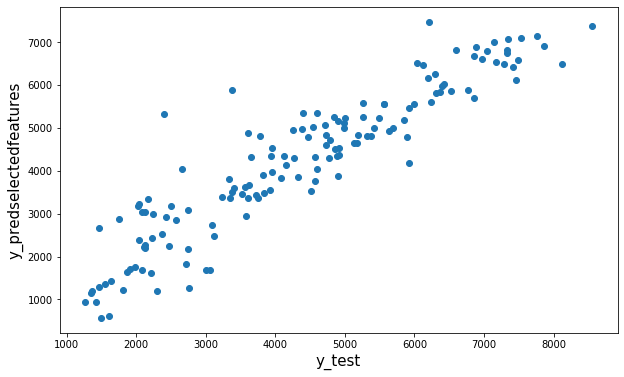

In [327]:
# Plotting y_test and y_pred using sactter plot to understand the spread of the Target variables

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predselectedfeatures)
plt.xlabel('y_test', fontsize=15)                          
plt.ylabel('y_predselectedfeatures', fontsize=15)
plt.show()

#### Adjusted r2 on training data

In [328]:
# Adjusted r2 on training data

yhat = lr.predict(x_train_selectedfeatures)                             
SumSquaresResidual = np.sum((y_train-yhat)**2)
SumSquaresTotal = np.sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train_selectedfeatures.shape[1]-1)
print(r_squared, adjusted_r_squared)

cnt    0.835289
dtype: float64 cnt    0.830341
dtype: float64


#### Adjusted r2 on test data

In [329]:
# Adjusted r2 on test data

yhat = lr.predict(x_testselectedfeatures)                              
SumSquaresResidual = np.sum((y_test-yhat)**2)
SumSquaresTotal = np.sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SumSquaresResidual))/SumSquaresTotal
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_testselectedfeatures.shape[1]-1)
print(r_squared, adjusted_r_squared)

cnt    0.847616
dtype: float64 cnt    0.827378
dtype: float64


# Actions performed above:

    - Importing and reading data
    - Finding Missing values    
    - Univariate and Bivariate Analysis for better insights of data
    - Feature selection
    - Considered the Linear regression Assumptions
    - Model Building
    - Model evaluation
    - Statistical Analysis to avoid multicollinearity and finding best features of the data
    - Verifying the accuracy after training the model on the new features which was considered after perfomring statistical analysis

# Final Result Comparison between Train model and Test:
    
- Train Adjusted R^2 : 0.835
- Test Adjusted R^2  : 0.847
- Difference in Adjusted R^2 between Train and Test data is : 1 % which is less than 5% indicates a **Good model**

    

# Inferences on Overall Stats model Building:
   - As observed in the analysis, We can see more demand for bikes in 2019 than 2018, Which indicates the business is gradually increasing the revenue over the days. So business can focus more on other variabes and can plan accordingly afetr the pandemic.
   - Business Can focus more on Summer & Winter season, March,May and  September month they have good influence on bike rentals.
   - We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can provide offers during this time to increase the revenue and attract customers.